## Fast.ai Deep Learning 1 Practice - Image Classification of Pets

This notebook is practice for Lesson 1 of the [Fast.ai](https://www.fast.ai) course. 
The dataset used is the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf).

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
# Downloads dataset and extracts the data

path = untar_data(URLs.PETS); path

PosixPath('/home/user/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/home/user/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/user/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/user/.fastai/data/oxford-iiit-pet/images/British_Shorthair_118.jpg'),
 PosixPath('/home/user/.fastai/data/oxford-iiit-pet/images/newfoundland_98.jpg'),
 PosixPath('/home/user/.fastai/data/oxford-iiit-pet/images/japanese_chin_162.jpg'),
 PosixPath('/home/user/.fastai/data/oxford-iiit-pet/images/english_setter_83.jpg'),
 PosixPath('/home/user/.fastai/data/oxford-iiit-pet/images/chihuahua_108.jpg')]

In [7]:
# Set to match course seed
np.random.seed(2)

# Regex pattern to extract labels from filenames
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
# Create a data bunch from the images
bs = 64
data = ImageDataBunch.from_name_re(path_img, fnames, pat,  ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

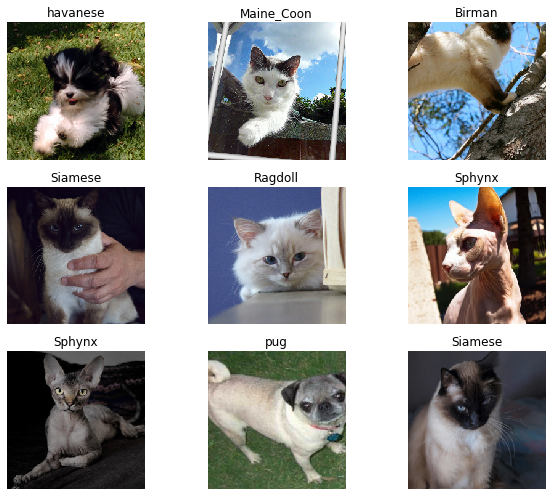

In [9]:
# Preview some of the data to make sure it looks correct
data.show_batch(rows=3, figsize=(9,7))

In [10]:
# To see full list of the classes that will be included in the model
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [11]:
# A convolutional neural network will be used, resnet34
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [36]:
# Training for 4 epochs
learn.fit_one_cycle(4)

epoch     train_loss  valid_loss  error_rate  time    
0         1.374035    0.293354    0.092693    00:20     
1         0.603536    0.245399    0.082544    00:17     
2         0.382265    0.239021    0.075778    00:17     
3         0.274600    0.224506    0.069689    00:18     


In [44]:
learn.save('stage-1')

<b> Analysis of one cycle </b>

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

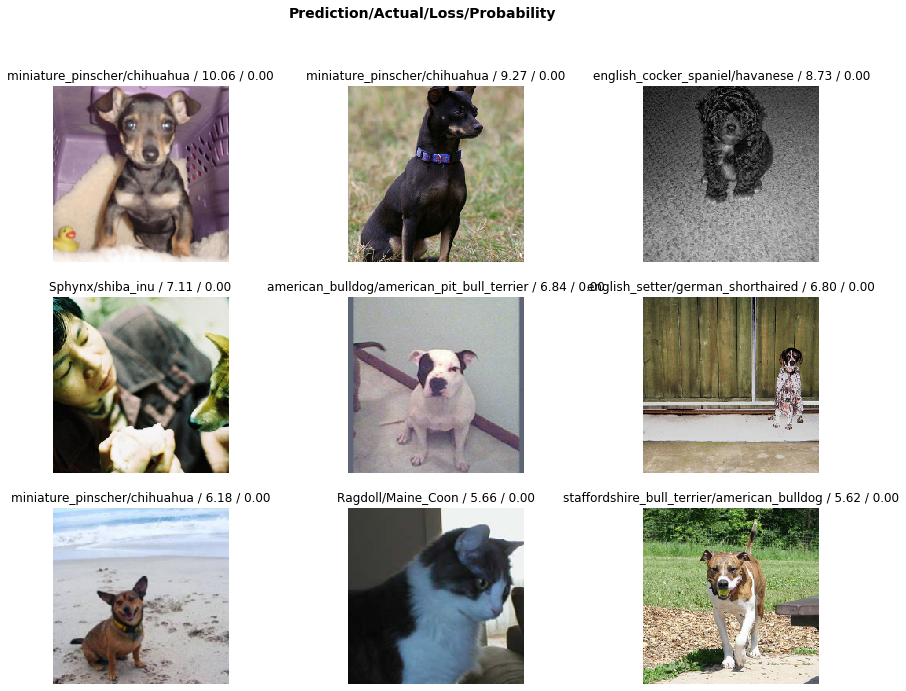

In [46]:
interp.plot_top_losses(9, figsize=(15,11))

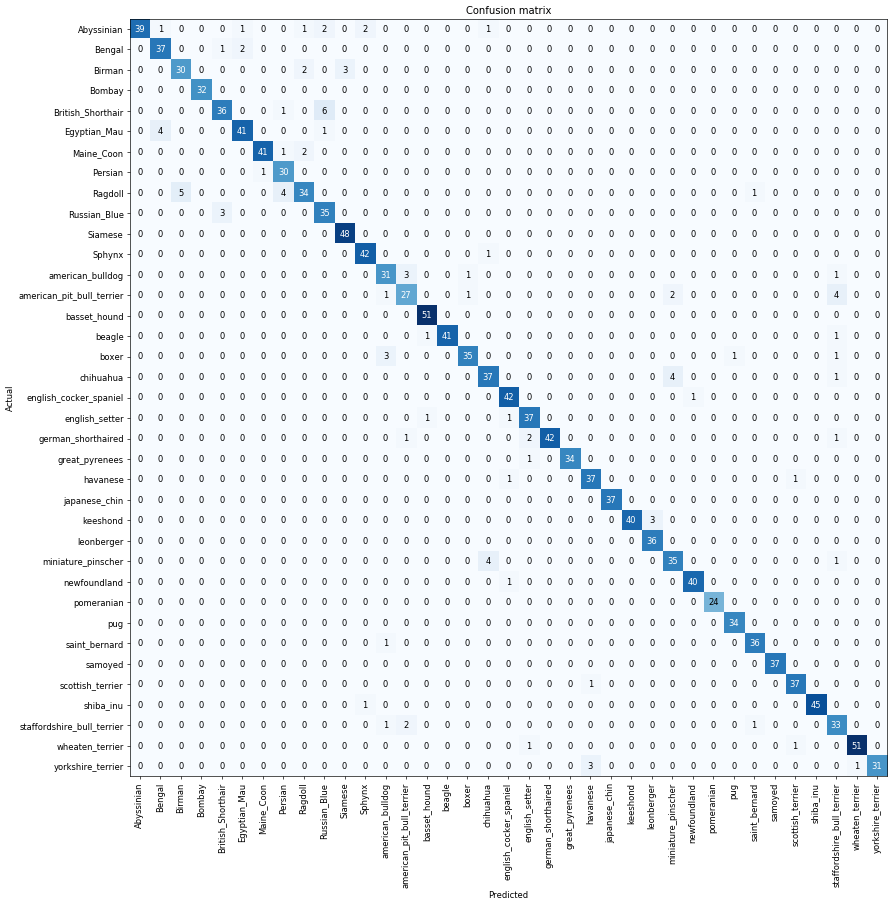

In [47]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [48]:
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Persian', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Birman', 'Siamese', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('boxer', 'american_bulldog', 3),
 ('keeshond', 'leonberger', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Abyssinian', 'Sphynx', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('german_shorthaired', 'english_setter', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

In [49]:
# Unfreeze model to continue training 
learn.unfreeze()

In [50]:
learn.fit_one_cycle(1)

epoch     train_loss  valid_loss  error_rate  time    
0         0.704507    0.365244    0.107578    00:20     


In [51]:
learn.load('stage-1');

In [52]:
learn.lr_find()

epoch     train_loss  valid_loss  error_rate  time    
0         0.960832    #na#        00:13       
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/home/user/anaconda3/envs/deep-learning/lib/python3.7/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


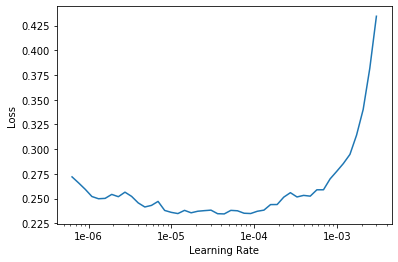

In [53]:
learn.recorder.plot()

In [54]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch     train_loss  valid_loss  error_rate  time    
0         0.233582    0.215445    0.066306    00:22     
1         0.206427    0.202996    0.061570    00:22     


## Training with resnet50

In [9]:
# Recreating the data bunch with larger image sizes and halved batch size

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                  size=299, bs=bs//2).normalize(imagenet_stats)

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


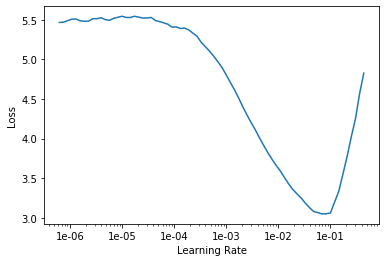

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.710620,0.278530,0.085927,00:52
1,0.513039,0.237752,0.082544,00:51
2,0.388195,0.254305,0.081191,00:51
3,0.375141,0.265974,0.083221,00:51
4,0.266663,0.214583,0.056834,00:51
5,0.208104,0.188287,0.055480,00:51
6,0.139912,0.191247,0.056157,00:51
7,0.112329,0.181919,0.057510,00:52


In [13]:
learn.save('stage-1-50')

In [14]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.121479,0.188512,0.056157,01:12
1,0.103029,0.168842,0.053451,01:09
2,0.094866,0.163241,0.048714,01:09


In [15]:
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.098199,0.184357,0.053451,01:10
1,0.083432,0.174726,0.050068,01:11
2,0.074136,0.171032,0.048038,01:10


In [16]:
learn.save('stage-1-50v2')

In the course example, they were able to achieve an error_rate of 0.043978 at this point. Unsure why it is different as settings were followed exactly. Perhaps just variation in how images were trained on.

## Trying out 400 image size and batch size of 16

In [19]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                  size=400, bs=bs//4).normalize(imagenet_stats)

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


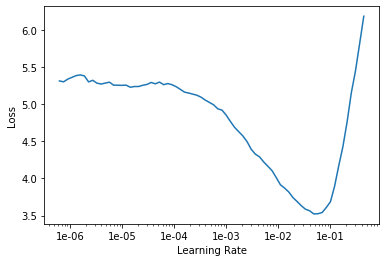

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.735337,0.349347,0.112991,01:28
1,0.607308,0.303272,0.092693,01:27
2,0.342766,0.187209,0.064276,01:28
3,0.249647,0.162415,0.052097,01:27


In [23]:
learn.save('stage-1-50v3')

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.219247,0.167506,0.048038,02:02
1,0.204752,0.170685,0.056157,02:01
2,0.152075,0.159442,0.050744,02:01


Didn't really seem to work, error_rate is worse than before. Also increased before decreasing again. Rollback to 'stage-1-50v2'

In [10]:
learn.load('stage-1-50v2');

In [13]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                  size=299, bs=bs//2).normalize(imagenet_stats)

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.935163,1.067224,0.291610,01:18
1,0.918843,0.734095,0.207037,01:11
2,0.444773,0.306349,0.090663,01:11
3,0.216666,0.198924,0.062923,01:11


In [18]:
# Trying slightly different stop slice value

learn.fit_one_cycle(3, max_lr=slice(1e-6, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.144790,0.203415,0.060217,01:08
1,0.139197,0.199022,0.060893,01:10
2,0.101303,0.195968,0.060217,01:10


## Trying out resnet101

In [9]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                  size=256, bs=bs//2).normalize(imagenet_stats)

In [10]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

In [11]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.664453,0.262967,0.079161,01:00
1,0.469224,0.309385,0.092016,00:56
2,0.405667,0.302669,0.082544,00:56
3,0.336763,0.229064,0.062246,00:56
4,0.239794,0.182062,0.048038,00:57
5,0.157290,0.177125,0.046685,00:56
6,0.117275,0.155465,0.046008,00:56
7,0.099848,0.153445,0.046008,00:57


In [12]:
learn.save('stage-1-101')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


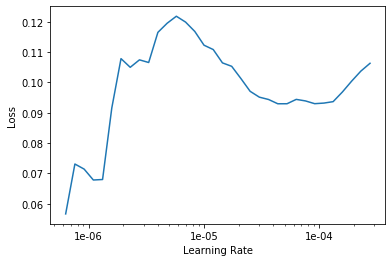

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.120303,0.209848,0.054127,01:10
1,0.148265,0.186182,0.048038,01:11
2,0.092768,0.169638,0.046008,01:11
3,0.070129,0.159061,0.046008,01:12


Error_rate will not get any lower than 0.046008